In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft
from scipy import signal

5 Hz Sine Wave i.e in 1 s 5 peaks

In [2]:
N = 500
f1 = 5
t = np.linspace(0, 1, N)
s = np.sin(f1 * 2 * np.pi * t)

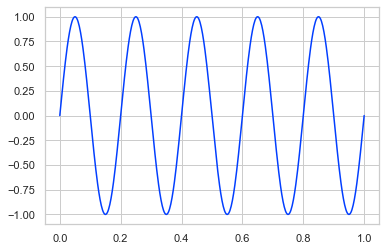

In [3]:
plt.plot(t,s)

In [4]:
signal_1 = pd.DataFrame(zip(t,s),columns=['Time','Value'])
signal_1

,Time,Value
0,0.000000,0.000000e+00
1,0.002004,6.291619e-02
2,0.004008,1.255831e-01
3,0.006012,1.877524e-01
4,0.008016,2.491777e-01
...,...,...
495,0.991984,-2.491777e-01
496,0.993988,-1.877524e-01
497,0.995992,-1.255831e-01
498,0.997996,-6.291619e-02


In [5]:
fft1 = np.fft.fftshift(np.fft.fft(signal_1['Value']))
freq_ = np.linspace(-N/2, N/2 - 1, num=N)

(-20.0, 20.0)

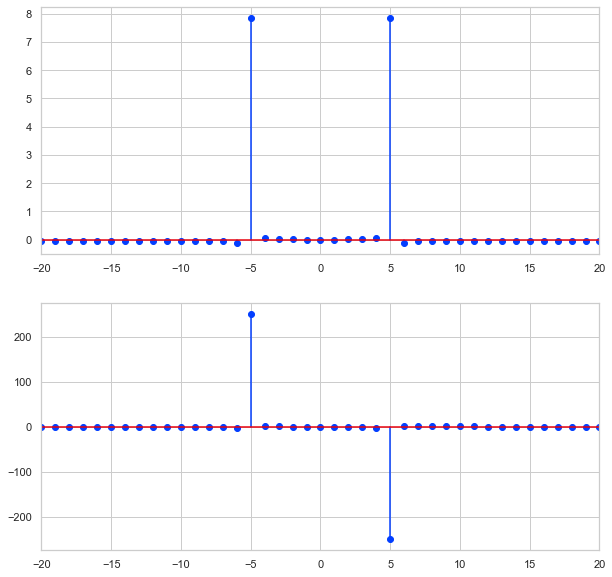

In [6]:
fig, axs = plt.subplots(2,figsize=(10,10))
axs[0].stem(freq_,(fft1.real))
axs[0].set_xlim([-20,20])
axs[1].stem(freq_,(fft1.imag))
axs[1].set_xlim([-20,20])

In [7]:
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = np.linspace(-N/2, N/2 - 1, num=N)
    fft1 = np.fft.fftshift(np.fft.fft(df['Value']))
    freq_ampli_real = pd.DataFrame(zip(f[N//2:],fft1[N//2:].real),columns=['Freq','Ampli'])
    freq_ampli_img = pd.DataFrame(zip(f[N//2:],fft1[N//2:].imag),columns=['Freq','Ampli'])
    return freq_ampli_real,freq_ampli_img
freq_ampli1,freq_ampli1i = freq(signal_1)

<StemContainer object of 3 artists>

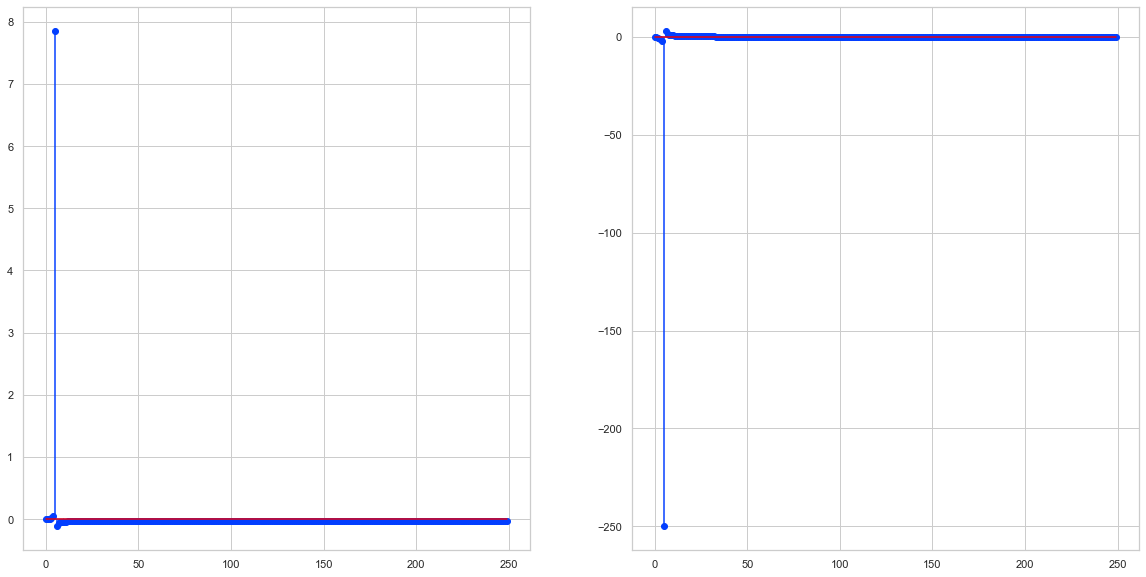

In [8]:
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
axs[1].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
#axs[0].set_xlim([0,10])
#axs[1].set_xlim([0,10])

In [41]:
def GMM_fit(df):
    dfx = df
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 10)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(dfx)
            bic.append(gmm.bic(dfx))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    return best_gmm

In [39]:
best_gmm0 = GMM_fit(freq_ampli1)
best_gmm0i = GMM_fit(freq_ampli1i)

In [40]:
best_gmm0

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [12]:
best_gmm0.means_

array([[ 3.99971025e+00,  8.56108624e-01],
       [ 2.11622243e+02, -3.14921319e-02],
       [ 1.03183192e+02, -3.16768438e-02],
       [ 1.52935733e+01, -3.66893800e-02]])

In [13]:
best_gmm0.weights_

array([0.03599355, 0.27235492, 0.63877686, 0.05287467])

In [14]:
best_gmm0i

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=9, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [15]:
best_gmm0i.means_

array([[ 2.29229959e+01,  2.39571952e-01],
       [ 1.21731120e+02,  3.32940011e-02],
       [ 1.69501456e+02,  1.77209308e-02],
       [ 5.88039666e+01,  8.29986611e-02],
       [ 5.00000000e+00, -2.49585124e+02],
       [ 8.55425620e+01,  5.36788589e-02],
       [ 7.60388028e+00,  3.47718746e-01],
       [ 2.22049924e+02,  5.65573553e-03],
       [ 3.90020010e+01,  1.30303194e-01]])

In [16]:
best_gmm0i.weights_

array([0.0604517 , 0.16475764, 0.21641161, 0.09010313, 0.004     ,
       0.12318805, 0.05946041, 0.21351591, 0.06811156])

In [26]:
z1,_ = best_gmm0.sample(250)
z1i,_ = best_gmm0i.sample(250)

(0.0, 10.0)

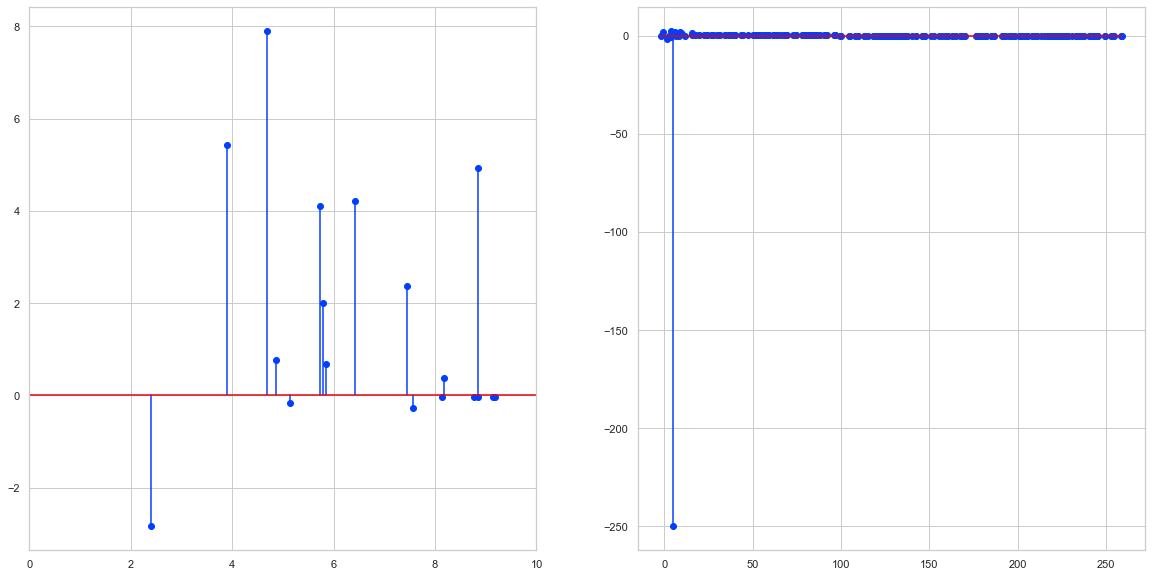

In [27]:
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(z1[:,0],z1[:,1])
axs[1].stem(z1i[:,0],z1i[:,1])
axs[0].set_xlim([0,10])
#axs[1].set_xlim([0,250])

In [88]:
def GMM_fit1(df):
    dfx = df
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 50)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(dfx)
            bic.append(gmm.bic(dfx))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    return best_gmm

In [89]:
gmm1 = GMM_fit1(signal_1)
gmm1

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=43, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [31]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

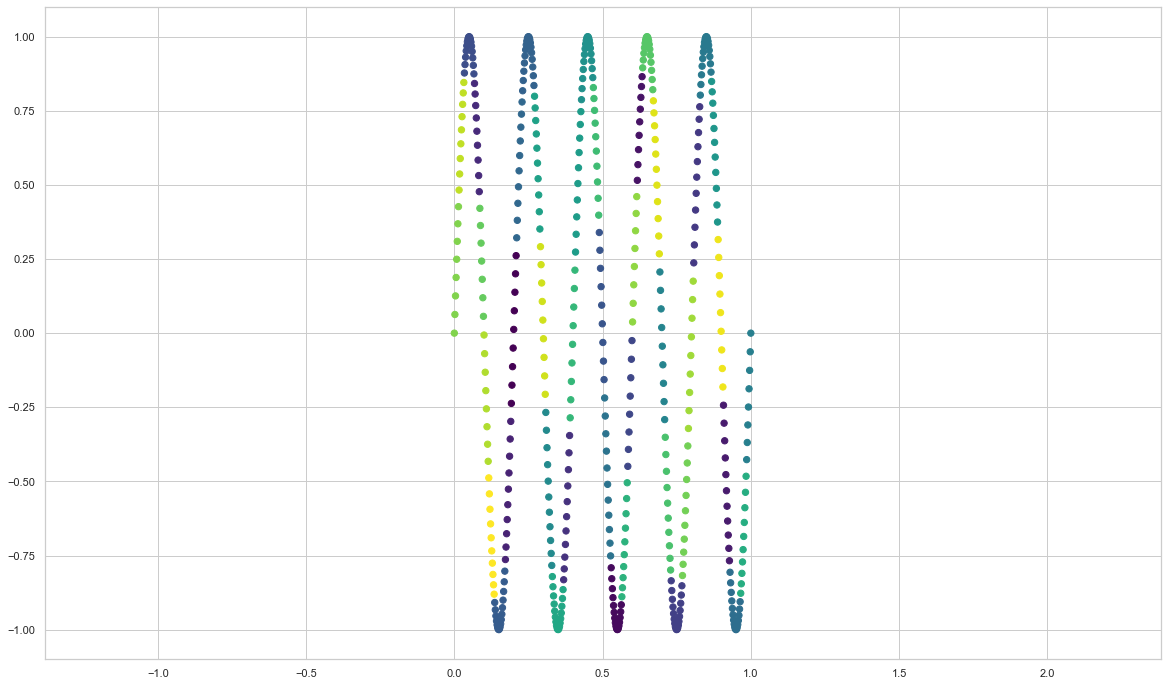

In [90]:
plt.figure(figsize=(20,12))
plot_gmm(gmm1,np.array(signal_1))

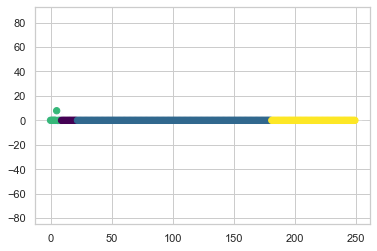

In [44]:
plot_gmm(best_gmm0,np.array(freq_ampli1))

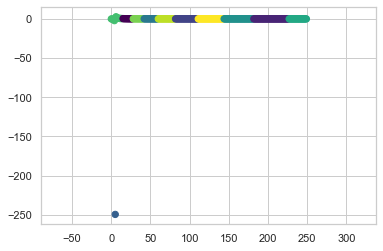

In [45]:
plot_gmm(best_gmm0i,np.array(freq_ampli1i))

In [93]:
z1,_ = gmm1.sample(1000)
z1

array([[ 0.22107383, -0.14688332],
       [ 0.20694949,  0.04830897],
       [ 0.19697221, -0.08053878],
       ...,
       [ 0.12423573, -0.73954526],
       [ 0.12578527, -0.77940564],
       [ 0.13809536, -0.85887191]])

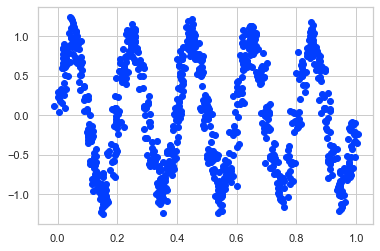

In [94]:
plt.scatter(z1[:,0],z1[:,1])